In [24]:
from data import get_data
from neural_network import NeuralNetwork
from randomforest.randomForestInterface import RandomForest
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
train_X, train_y, val_X, val_y, test_X, test_y = get_data()

In [13]:
models = [NeuralNetwork(), RandomForest()]
for model in models:
  model.train(train_X, train_y, val_X, val_y)


Finished training! Time elapsed: 152.2182891368866


In [25]:
predictions = []
confusion_matrices = []
accuracies = []
recalls = []
precisions = []
f1s = []
for model in models:
  pred = model.predict(test_X)
  predictions.append(pred)
  accuracies.append(accuracy_score(test_y, pred))
  confusion_matrices.append(confusion_matrix(test_y, pred))
  precisions.append(precision_score(test_y, pred, average=None))
  recalls.append(recall_score(test_y, pred, average=None))
  f1s.append(f1_score(test_y, pred, average=None))


In [28]:
print("Accuracies:")
for i in range(len(models)):
  print(f"Model {i} has an accuracy of {accuracies[i]}")


Accuracies:
Model 0 has an accuracy of 0.8427230046948356
Model 1 has an accuracy of 0.8497652582159625


In [30]:
print("F1 Scores:")
for i in range(len(models)):
  print(f"Model {i} has an F1 score of {f1s[i]}.")


F1 Scores:
Model 0 has an F1 score of [0.9165488  0.30952381 0.72131148].
Model 1 has an F1 score of [0.9317852 0.5046729 0.5      ].


In [31]:
print("Precisions:")
for i in range(len(models)):
  print(f"Model {i} has a precision score of {precisions[i]}.")


Precisions:
Model 0 has a precision score of [0.86170213 0.48148148 0.95652174].
Model 1 has a precision score of [0.89664804 0.54       0.77777778].


In [32]:
print("Recalls:")
for i in range(len(models)):
  print(f"Model {i} has a recall score of {recalls[i]}.")


Recalls:
Model 0 has a recall score of [0.97885196 0.22807018 0.57894737].
Model 1 has a recall score of [0.96978852 0.47368421 0.36842105].


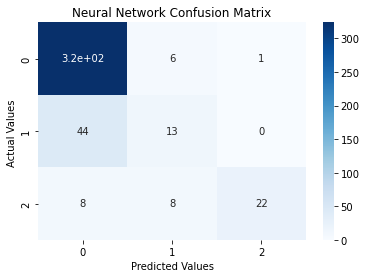

In [21]:
ax = sn.heatmap(confusion_matrices[0], annot=True, cmap='Blues')
ax.set_title('Neural Network Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels([0, 1, 2])
ax.yaxis.set_ticklabels([0, 1, 2])
plt.show()


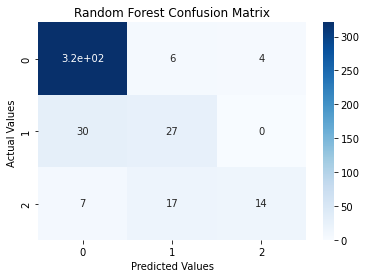

In [22]:
ax = sn.heatmap(confusion_matrices[1], annot=True, cmap='Blues')
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels([0, 1, 2])
ax.yaxis.set_ticklabels([0, 1, 2])
plt.show()
